## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [ ]:
!pip install pandas_datareader

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

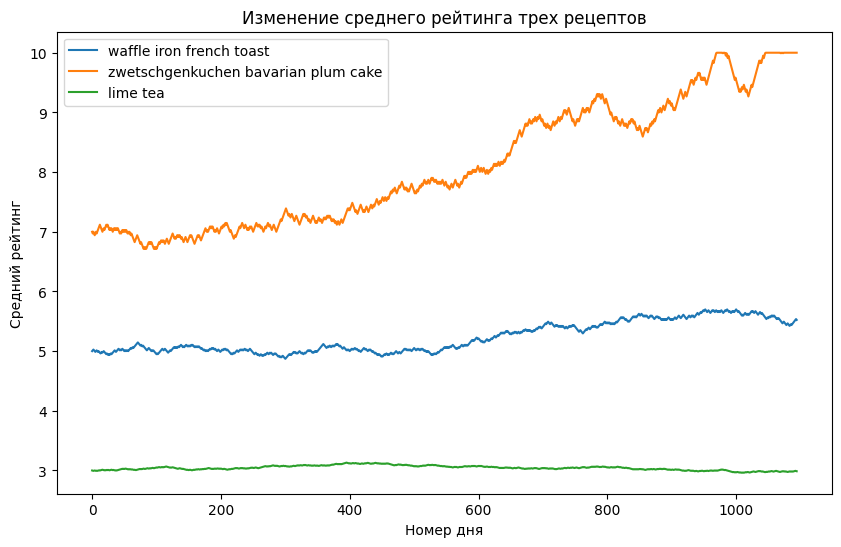

In [13]:
# Загрузим данные из файла
data = np.load('data/average_ratings.npy')

# Определим количество дней (размер данных по первой оси)
num_days = data.shape[1]

# Определим рецепты и их индексы
recipes = ['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea']

# Создадим график
plt.figure(figsize=(10, 6))

# Построим временные ряды для каждого рецепта
for i, recipe in enumerate(recipes):
    plt.plot(range(num_days), data[i], label=recipe)

# Добавим подписи к осям
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')

# Добавим подпись к рисунку
plt.title('Изменение среднего рейтинга трех рецептов')

# Добавим легенду
plt.legend()

# Отобразим график
plt.show()


2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


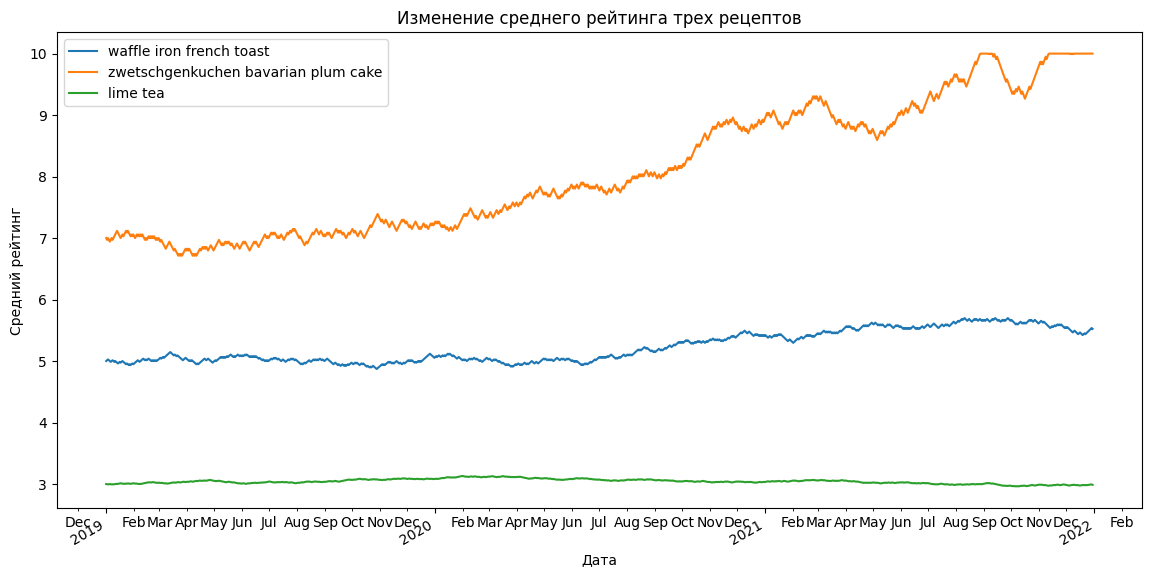

In [14]:
# Загрузим данные из файла
data = np.load('data/average_ratings.npy')

# Создадим диапазон дат с 01.01.2019 по 30.12.2021
date_range = pd.date_range(start='2019-01-01', end='2021-12-30', freq='D')

# Убедимся, что размер date_range совпадает с количеством дней в данных
assert len(date_range) == data.shape[1], "Количество дат не соответствует количеству дней в данных."

# Определим рецепты и их индексы
recipes = ['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea']

# Создадим график
plt.figure(figsize=(14, 7))

# Построим временные ряды для каждого рецепта
for i, recipe in enumerate(recipes):
    plt.plot(date_range, data[i], label=recipe)

# Настроим форматирование горизонтальной оси
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

# Добавим подписи к осям
plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')

# Добавим подпись к рисунку
plt.title('Изменение среднего рейтинга трех рецептов')

# Добавим легенду
plt.legend()

# Улучшим читаемость меток
plt.gcf().autofmt_xdate()

# Отобразим график
plt.show()


3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

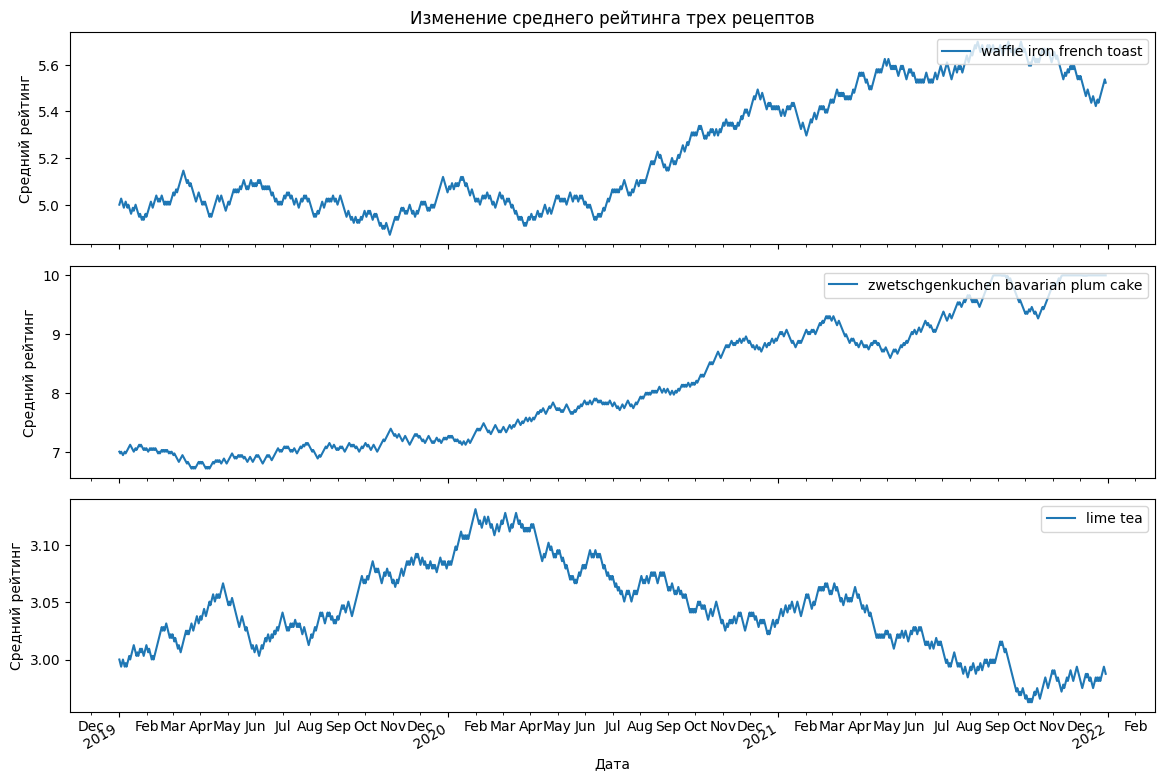

In [12]:
# Загрузим данные из файла
data = np.load('data/average_ratings.npy')

# Создадим диапазон дат с 01.01.2019 по 30.12.2021
date_range = pd.date_range(start='2019-01-01', end='2021-12-30', freq='D')

# Убедимся, что размер date_range совпадает с количеством дней в данных
assert len(date_range) == data.shape[1], "Количество дат не соответствует количеству дней в данных."

# Определим рецепты и их индексы
recipes = ['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea']

# Создадим фигуру и оси
fig, axs = plt.subplots(3, 1, figsize=(14, 10), sharex=True, gridspec_kw={'hspace': 0.1})

# Настроим форматирование горизонтальной оси для нижнего графика
for ax in axs:
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

# Построим временные ряды для каждого рецепта на отдельных графиках
for i, (ax, recipe) in enumerate(zip(axs, recipes)):
    ax.plot(date_range, data[i], label=recipe)
    ax.set_ylabel('Средний рейтинг')
    ax.legend(loc='upper right')
    if i == 0:
        ax.set_title('Изменение среднего рейтинга трех рецептов')

# Подпись горизонтальной оси для самого нижнего графика
axs[-1].set_xlabel('Дата')

# Улучшим читаемость меток для самого нижнего графика
fig.autofmt_xdate()

# Отобразим график
plt.show()


4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


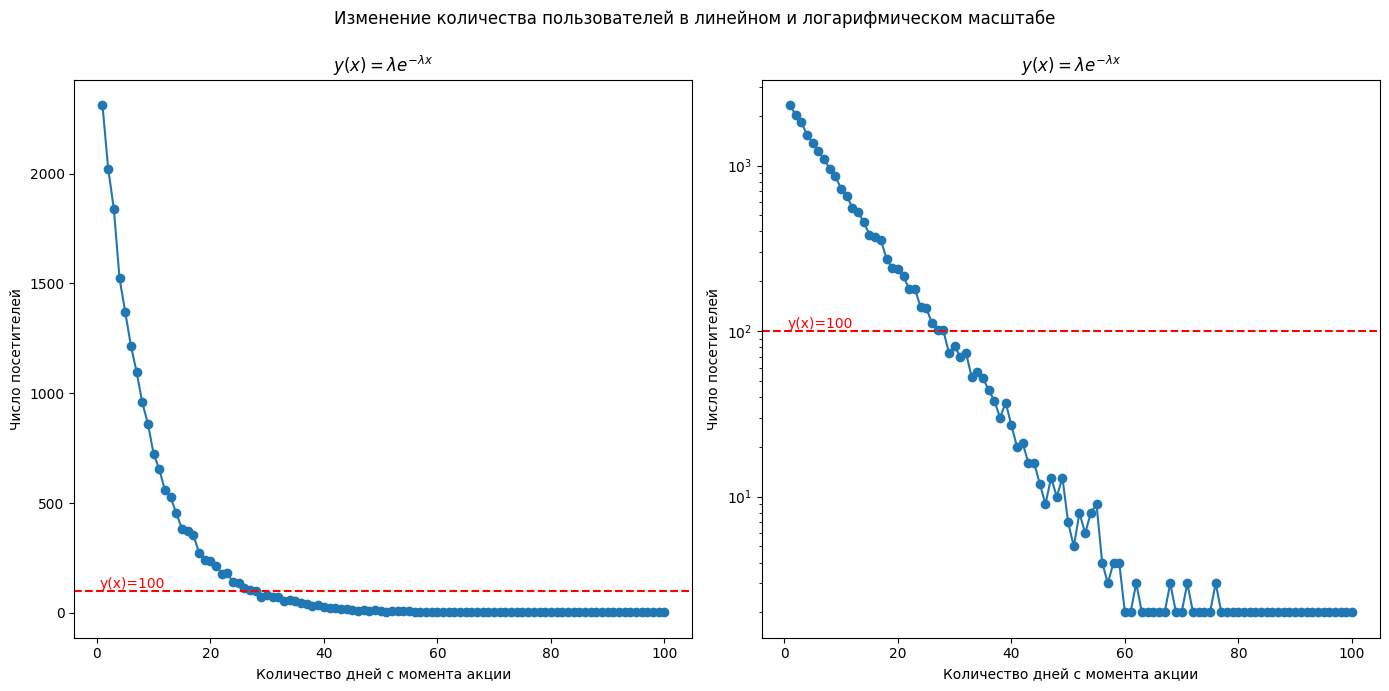

In [11]:
# Загрузим данные из файла
visitors = np.load('data/visitors.npy')

# Создадим фигуру и два подграфика
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Линейный масштаб
axs[0].plot(range(1, 101), visitors, marker='o', linestyle='-')
axs[0].axhline(y=100, color='red', linestyle='--')
axs[0].text(0.5, 100, 'y(x)=100', color='red', va='bottom', ha='left')
axs[0].set_title(r'$y(x)=\lambda e^{-\lambda x}$')
axs[0].set_xlabel('Количество дней с момента акции')
axs[0].set_ylabel('Число посетителей')

# Логарифмический масштаб
axs[1].plot(range(1, 101), visitors, marker='o', linestyle='-')
axs[1].axhline(y=100, color='red', linestyle='--')
axs[1].text(0.5, 100, 'y(x)=100', color='red', va='bottom', ha='left')
axs[1].set_yscale('log')
axs[1].set_title(r'$y(x)=\lambda e^{-\lambda x}$')
axs[1].set_xlabel('Количество дней с момента акции')
axs[1].set_ylabel('Число посетителей')

# Добавим общий заголовок для фигуры
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

# Отобразим график
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Чтобы общий заголовок не накладывался на графики
plt.show()


## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [17]:
reviews = pd.read_csv('data/reviews_sample.csv')
recipes = pd.read_csv('data/recipes_sample.csv')

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

C:\Users\denis\AppData\Local\Temp\ipykernel_10380\288371278.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = recipes.groupby('duration_group').agg(


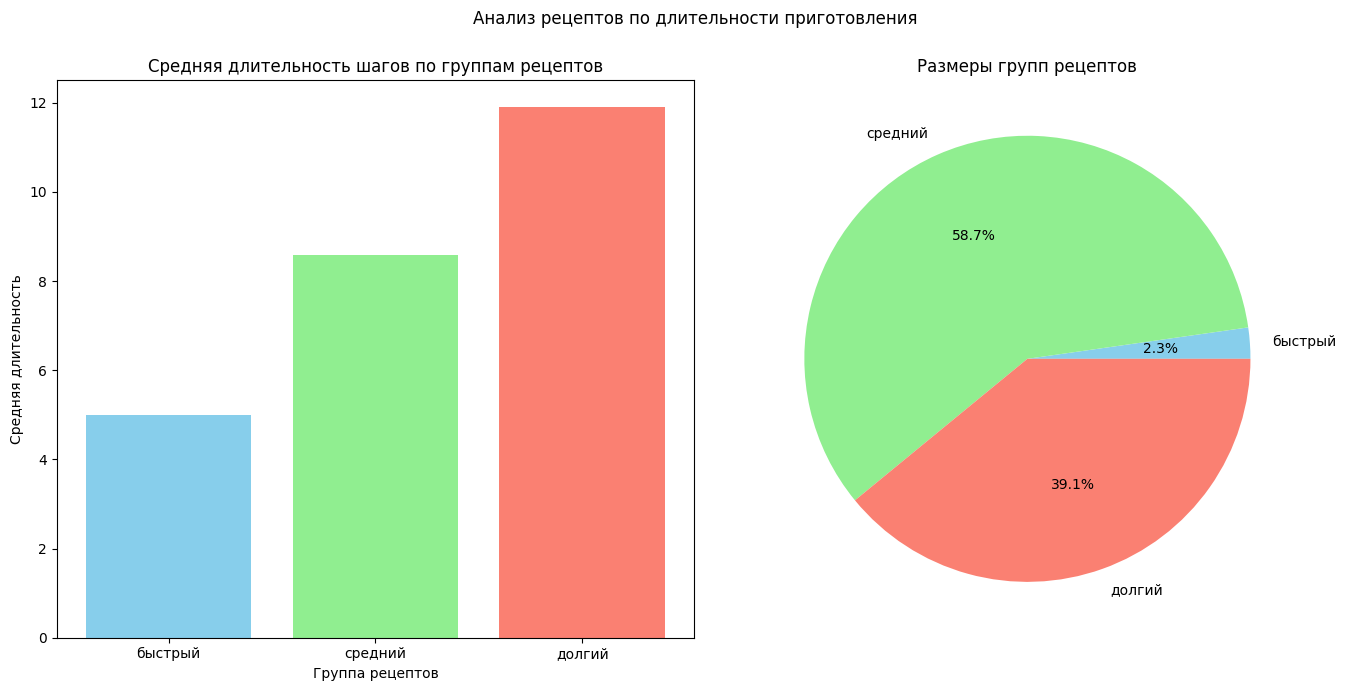

In [29]:
# Определим группы рецептов по длительности
conditions = [
    (recipes['minutes'] < 5),
    (recipes['minutes'] >= 5) & (recipes['minutes'] < 50),
    (recipes['minutes'] >= 50)
]
choices = ['быстрый', 'средний', 'долгий']
recipes['duration_group'] = pd.cut(recipes['minutes'], bins=[0, 5, 50, float('inf')], labels=choices, right=False)

# Группируем данные и вычисляем необходимые величины
grouped = recipes.groupby('duration_group').agg(
    avg_steps=('n_steps', 'mean'),
    size=('id', 'count')
).reset_index()

# Создаем фигуру и оси для графиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Столбчатая диаграмма
ax1.bar(grouped['duration_group'], grouped['avg_steps'], color=['skyblue', 'lightgreen', 'salmon'])
ax1.set_xlabel('Группа рецептов')
ax1.set_ylabel('Средняя длительность')
ax1.set_title('Средняя длительность шагов по группам рецептов')

# Круговая диаграмма
ax2.pie(grouped['size'], labels=grouped['duration_group'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
ax2.set_title('Размеры групп рецептов')

# Добавляем общий заголовок для фигуры
fig.suptitle('Анализ рецептов по длительности приготовления')

# Отображаем графики
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

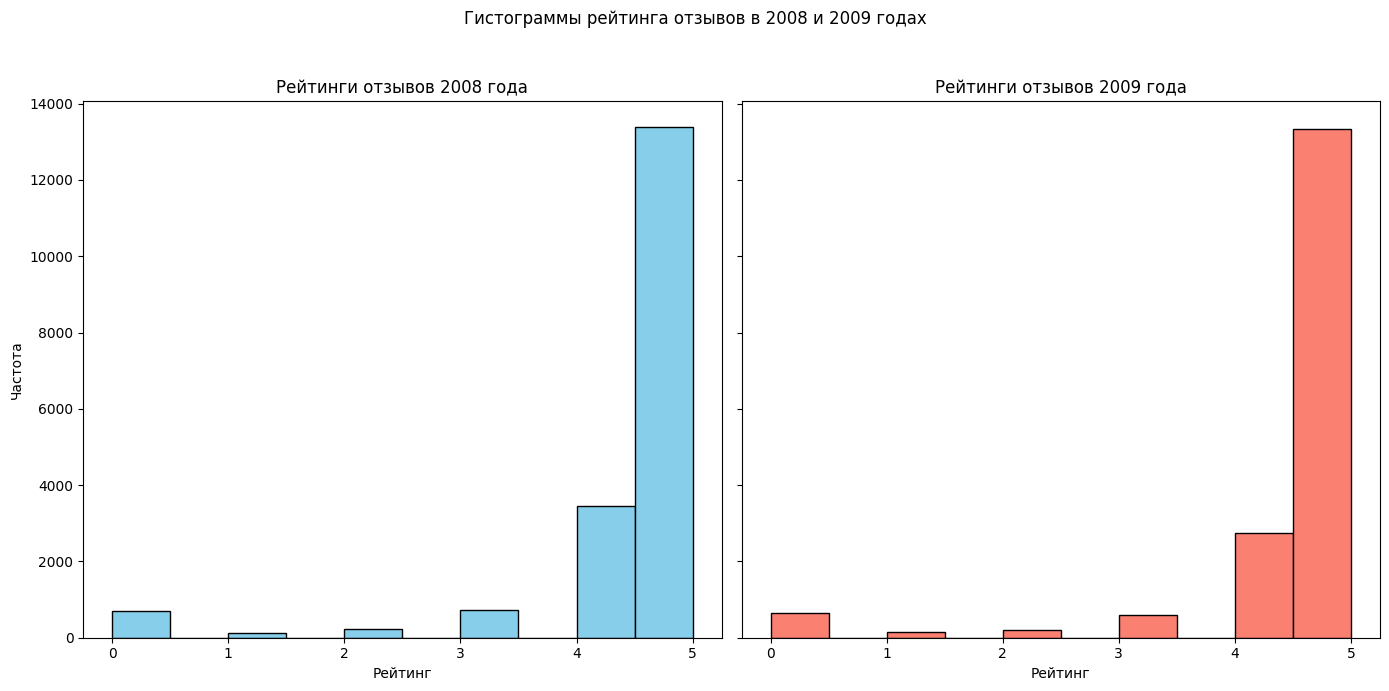

In [33]:
# Загрузим данные из файла CSV
reviews = pd.read_csv('data/reviews_sample.csv')

# Преобразуем столбец `date` в формат datetime
reviews['date'] = pd.to_datetime(reviews['date'])

# Отфильтруем отзывы за 2008 и 2009 годы
reviews_2008 = reviews[reviews['date'].dt.year == 2008]
reviews_2009 = reviews[reviews['date'].dt.year == 2009]

# Создадим фигуру и оси для двух гистограмм
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Построим гистограммы для каждого года
reviews_2008['rating'].plot.hist(ax=ax1, bins=10, color='skyblue', edgecolor='black')
reviews_2009['rating'].plot.hist(ax=ax2, bins=10, color='salmon', edgecolor='black')

# Добавим подписи и заголовки
ax1.set_title('Рейтинги отзывов 2008 года')
ax1.set_xlabel('Рейтинг')
ax1.set_ylabel('Частота')

ax2.set_title('Рейтинги отзывов 2009 года')
ax2.set_xlabel('Рейтинг')

# Добавим общую подпись для рисунка
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

# Подстроим расположение графиков
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Отобразим график
plt.show()


### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

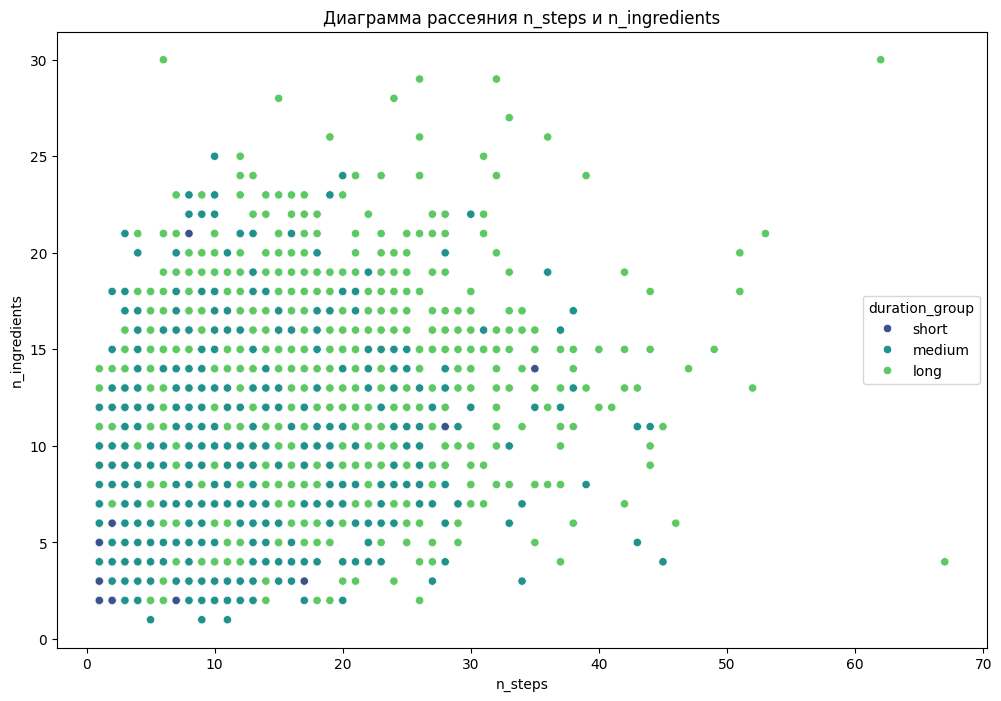

In [34]:
# Загрузка данных
recipes = pd.read_csv('data/recipes_sample.csv')

# Определим группы рецептов по длительности
conditions = [
    (recipes['minutes'] < 5),
    (recipes['minutes'] >= 5) & (recipes['minutes'] < 50),
    (recipes['minutes'] >= 50)
]
choices = ['short', 'medium', 'long']
recipes['duration_group'] = pd.cut(recipes['minutes'], bins=[0, 5, 50, float('inf')], labels=choices, right=False)

# Построение диаграммы рассеяния
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=recipes, x='n_steps', y='n_ingredients', hue='duration_group', palette='viridis')

# Добавим заголовок
scatter_plot.set_title('Диаграмма рассеяния n_steps и n_ingredients')

# Отобразим график
plt.show()


8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"